In [137]:
"""Lennard-Jones for specific atom"""

import numpy as np

class atom_props():
    def __init__(self, sigma, epsilon):
        self.sig = sigma
        self.eps = epsilon

def pot_LJ(atom,r):
    sig = atom.sig
    eps = atom.eps
    return 4*eps*((sig/r)**12 - (sig/r)**6)   

def pot_LJ_DL(r):
    u = np.zeros(r.shape)
    u[r != 0] = 4*((1/r[r != 0])**12 - (1/r[r != 0])**6)   
    u[r == 0] = 0 
    return u
    

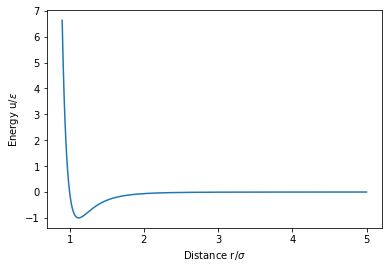

In [112]:
# Plotting the potential for Argon
import matplotlib.pyplot as plt
k_b = 1.38e-23
argon = atom_props(3.405e-10, k_b*119.8)        

x_t = np.linspace(0.9,5,1000)
u_t = pot_LJ_DL(x_t);

plt.plot(x_t,u_t)
plt.xlabel(r'Distance r/$\sigma$')
plt.ylabel(r'Energy u/$\epsilon$')
plt.show()
   

In [146]:
# Initiazlize box and particles
def particle_generator(L, N):
    x = np.random.random((dim,N))*L
    v = np.zeros((dim,N),dtype=float)
    return (x,v)
    
L = 5 # Box size
N = 3 # partciles
dim = 2 # Dimensions of the probem

(x,v) = particle_generator(L,N)


In [148]:
# Calcolate distances to NN
r = np.zeros((N,N))
NN_max_dist = L/2

for i in range(dim):
    delta = x[i,:].reshape(1,N)-x[i,:].reshape(N,1)
    print(x[i,:])
    delta[delta > NN_max_dist] =L - delta[delta > NN_max_dist] 
    delta[delta < -NN_max_dist] = L - delta[delta < -NN_max_dist] 
    x[i,:] += delta
    print(x[i,:])
    r += delta**2   
            
r = np.sqrt(r)
print(r)

U = pot_LJ_DL(r)



[ 0.21189183  2.35693624  2.94825574]


ValueError: non-broadcastable output operand with shape (3,) doesn't match the broadcast shape (3,3)

array([[  0.00000000e+00,  -1.72306820e-02,   4.82860826e+00],
       [ -1.72306820e-02,   0.00000000e+00,  -4.08102338e-03],
       [  4.82860826e+00,  -4.08102338e-03,   0.00000000e+00]])